# Pymaceuticals Inc.
---

### Analysis

- In the following pharmaceutical study of mice our given data is sorted into a combination of drug regiment, sex, weight and tumor volumes.Throughout the various filters applied to concise our data , charts are created to better understand what is occurring throughout the study. In the boxplots one can compare the four different types of drug regimens to determine if the tumor volumes have lowered or even gotten higher in size. Viewing all the four drug regimens will allow one to see, which has a more effectively reduced tumor size. One can then move on to  the line plot where individual drug regimens are presented, and one can easily determine if over the time period of days the tumor has reduced in size. In this specific example of using mouse I509 one can easily see the decreasing tumor volume size at approximately day 34. With this individual mouse and treatment, it can then be said that the treatment has been effective. 
The other plots to come then provide different  factors to weigh in into the mice experiment of tumor reduction. 

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results) # on ="left"? , how = "Mouse ID"
#pd.merge(mouse_data, study_data, on="Mouse ID")
print(combined_data.head())

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = len(combined_data["Mouse ID"].unique())
number_mice

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_miceID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), 'Mouse ID'].unique() #duplicated() checks for duplicate rows in DF for rows that have the same values in both the Mouse ID and Timepoint columns 


In [18]:
# Optional: Get all the data for the duplicate mouse ID.
 # Check for duplicate entries
print("Number of duplicate entries:", combined_data.duplicated().sum())

# Drop duplicates if any are found
cleaned_data = combined_data.drop_duplicates()

Number of duplicate entries: 1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_miceID)== False] #isin? 
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
number_Clean_mice = len(clean_data["Mouse ID"].unique())
number_Clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Drug_Regiem_MEAN = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_Regiem_MEAN = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_Regiem_VARIANCE = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_Regiem_StandardDev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_Regiem_SEM = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Stats_summary = pd.DataFrame({"Tumor Volume Mean": Drug_Regiem_MEAN,
                             "Tumor Volume Median": Drug_Regiem_MEAN ,
                             " Tumor Volume Varience": Drug_Regiem_VARIANCE,
                             "Tumor Volume Standard Deviation":Drug_Regiem_StandardDev,
                             "Tumor Volume SEM":Drug_Regiem_SEM

})

Stats_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Varience,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,41.557809,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,52.288934,61.168083,7.821003,0.581331
Propriva,50.446266,50.446266,43.852013,6.622085,0.544332
Ramicane,40.673236,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Calculate mean, median, variance, standard deviation, and SEM (Standard Error of Mean) for each treatment
## summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [10]:
TotalDrug_Regiem = clean_data.groupby("Drug Regimen")["Mouse ID"].count()
TotalDrug_Regiem

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

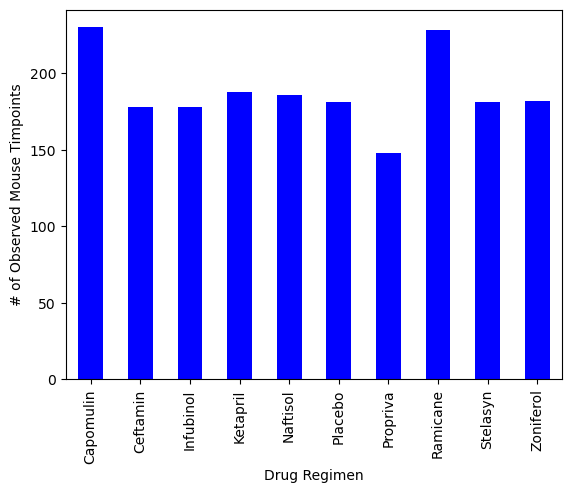

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

TotalDrug_Regiem = clean_data.groupby("Drug Regimen")["Mouse ID"].count() # is this pandas? YEs right with a dataset of TotalDrug_Regiem a kind= bar created 


panda_bar = TotalDrug_Regiem.plot(kind = "bar", color = 'b')

#labels for bar plot 1
plt.xlabel("Drug Regimen") #can be added in after or inside?
plt.ylabel("# of Observed Mouse Timpoints")
plt.show

In [12]:
drug_regimen = clean_data["Drug Regimen"].value_counts() #count each unqiue value 
drug_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timpoints')

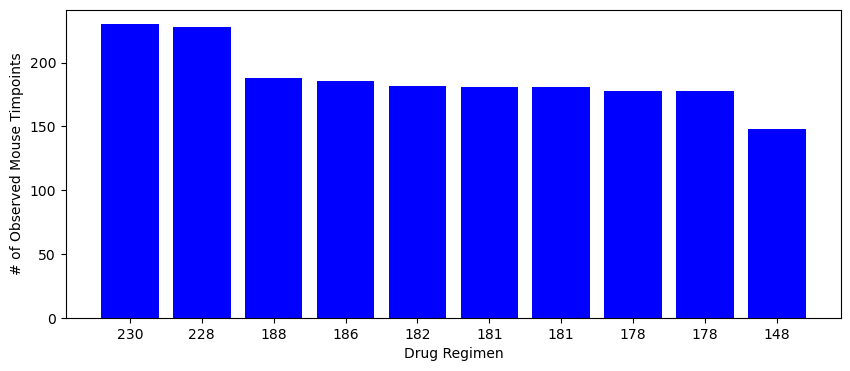

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#pyplot 
#set x_axis 
import numpy as np #needed?

drug_regimen = clean_data["Drug Regimen"].value_counts()

#set x_axis and tick locaton 
x_axis = np.arange(0, len(drug_regimen))
tick_locations = [value for value in x_axis]

#labels 
plt.figure(figsize = (10,4))
plt.bar(x_axis, drug_regimen, color = 'blue', alpha = 1, align = "center")
plt.xticks(tick_locations, drug_regimen)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")

#where to add names into x-axis


In [14]:
sex_data = clean_data["Sex"].value_counts()
sex_data

Sex
Male      958
Female    922
Name: count, dtype: int64

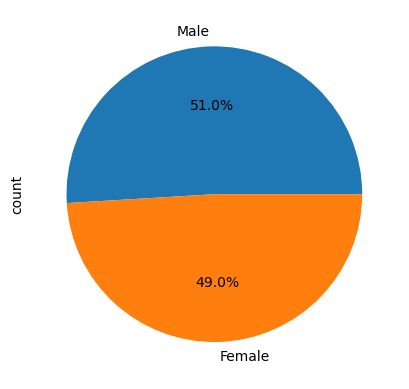

In [17]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_data =clean_data["Sex"].value_counts()
# Get the unique mice with their gender


# Make the pie chart
panda_bar = sex_data.plot(kind = "pie", color = 'b', autopct="%1.1f%%") # add sex_data to get the value_count 

([<matplotlib.patches.Wedge at 0x126ef4110>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

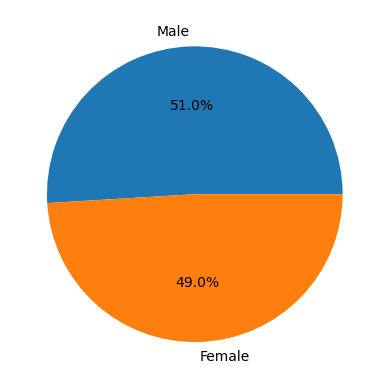

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_data = clean_data["Sex"].value_counts()
# Get the unique mice with their gender

mice_gender = ['Male', 'Female']

# Make the pie chart
plt.pie(sex_data, labels = mice_gender, autopct="%1.1f%%")  #add labels within ()?


## Quartiles, Outliers and Boxplots

In [ ]:
# Create a list of tumor volumes for each selected regimen
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = [cleaned_data[cleaned_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in regimen_list]

# Generate the box plot
plt.boxplot(tumor_volumes, labels=regimen_list)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution by Drug Regimen")
plt.show()

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_regimens = clean_data[clean_data['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])] #reduce clean data to only view the four treatments 

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()  #max since at timepoint 45 will be the last(greatest)tumor
last_timepoint.reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_data = pd.merge(clean_data, last_timepoint, on=["Mouse ID", "Timepoint"])

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = [cleaned_data[cleaned_data["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in regimen_list]

In [25]:

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = clean_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerquart = quartiles[0.25]
upperquart = quartiles[0.75]
iqr = upperquart - lowerquart

 #bounds
lower_bound = lowerquart - (1.5 * iqr)  # less than or below quart lowerquart-(1.5 * IQR) wiskers 
upper_bound = upperquart + (1.5 * iqr) # greater than or above upper + (1.5 * IQR)

outliers = clean_data[(clean_data["Tumor Volume (mm3)"] < lower_bound) | (clean_data["Tumor Volume (mm3)"] > upper_bound)]

   

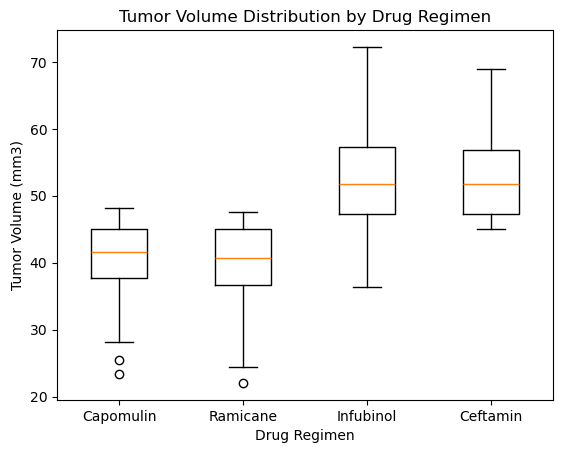

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=regimen_list)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Distribution by Drug Regimen")
plt.show()


## Line and Scatter Plots

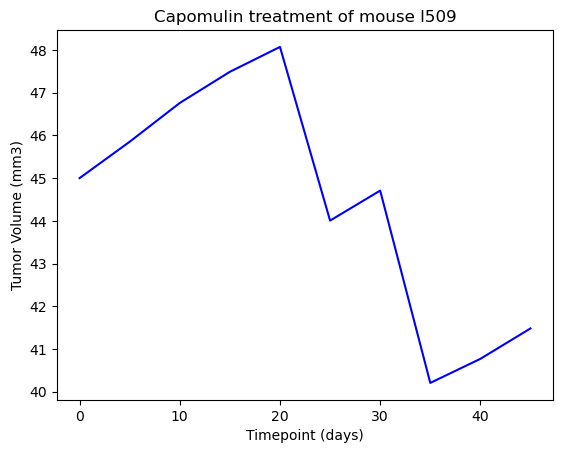

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for mouse l509 treated with Capomulin
mouse_data = cleaned_data[(cleaned_data["Mouse ID"] == "l509") & (cleaned_data["Drug Regimen"] == "Capomulin")]

#Line plot using mouse l509 data
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()



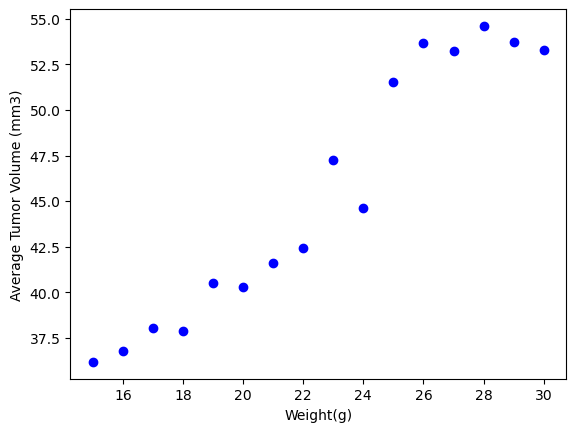

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Plot tumor volume over time for mouse l509
mouse_data = cleaned_data[(cleaned_data["Mouse ID"] == "l509") & (cleaned_data["Drug Regimen"] == "Capomulin")]
average_tumor_volume = clean_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

#Line plot using mouse l509 data
plt.scatter(average_tumor_volume.index, average_tumor_volume, color="blue") #.index is x values so the weight , and then tumor volume with average_tumor_volume
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


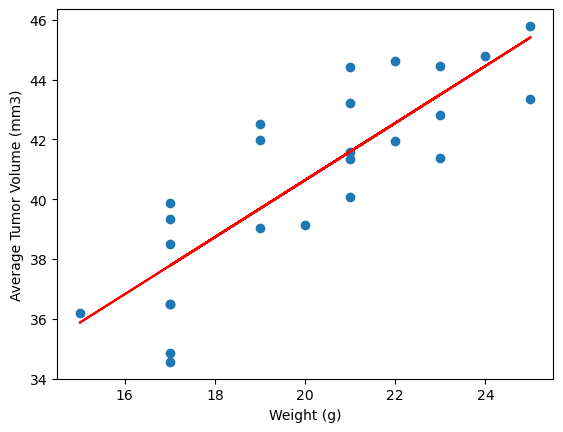

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

